In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from res.modules import testTrainSplit

In [2]:
class LinearReg(object):
    """
    Linear Reression Class:
    Attributes - 
        1) W - model Parameters
    
    Methods - 
        1) fit - executes learning algorithm on given training data and sets model 
                 parameters
        2) Predict - returns prediction
    """

    def __init__(self):
        self.W = None
    
    def model(self, X):
        S = np.dot(self.W,X)
        prediction = S
        return prediction
    
    def predict(self, xData):
        """
        Input:  Xdata - numpy array of shape [examples, 1+attributes]
                where first column in attributes is all ones (dummy feature)
        Output: Prediction
        """
        yPred = []
        for X in xData:
            yPred.append(self.model(X))
        return np.array(yPred)
    
    def fit(self, xData, yData):
        """
        Input:  xData - input training examples 
                        numpy array of shape [examples, 1+attributes]
                        where first column in attributes is all ones (dummy feature)
                yData - Actual Output Values
        
        This functions runs the learning algorithm and sets the model weights
        """
        XtX = np.matmul(xData.T, xData)
        X_dag = np.matmul(np.linalg.inv(XtX), xData.T)
        self.W = np.matmul(X_dag, yData)

In [3]:
# datasete url
# https://www.kaggle.com/mohansacharya/graduate-admissions
data = pd.read_csv('./data/admissionPredict.csv', index_col= 0)

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
xData = data.iloc[:,:-1].values
yData = data.iloc[:,-1].values

In [6]:
x0 = np.ones((xData.shape[0], 1))
xData = np.concatenate((x0, xData), axis = 1)

examples, attributes = xData.shape

In [7]:
xTest, xTrain, yTest, yTrain = testTrainSplit(xData, yData, stratify=False)

In [8]:
lrModel = LinearReg()

In [9]:
lrModel.fit(xTrain, yTrain)

In [10]:
# Predicted Output Values
yPred = lrModel.predict(xTest)

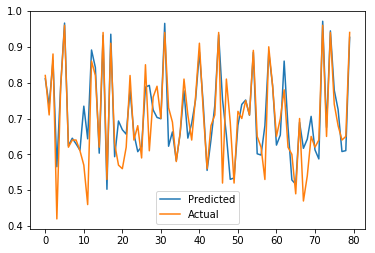

In [11]:
plt.plot(yPred, label='Predicted')
plt.plot(yTest, label='Actual')
plt.legend()
plt.show()

In [12]:
print(f'Mean Square loss is: {np.mean((yPred -yTest)**2)}')

Mean Square loss is: 0.004878006449066677
